In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data_part3 = pd.read_csv('dataset_part3.csv')
data_part3.head(5)

,Flight Number,Launch site,Payload,PLM,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time,Class
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.0B0003.1,Failure,4 June 2010,18:45,1
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43,1
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.0B0005.1,No attempt\n,22 May 2012,07:44,1
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.0B0006.1,No attempt,8 October 2012,00:35,1
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.0B0007.1,No attempt\n,1 March 2013,15:10,1


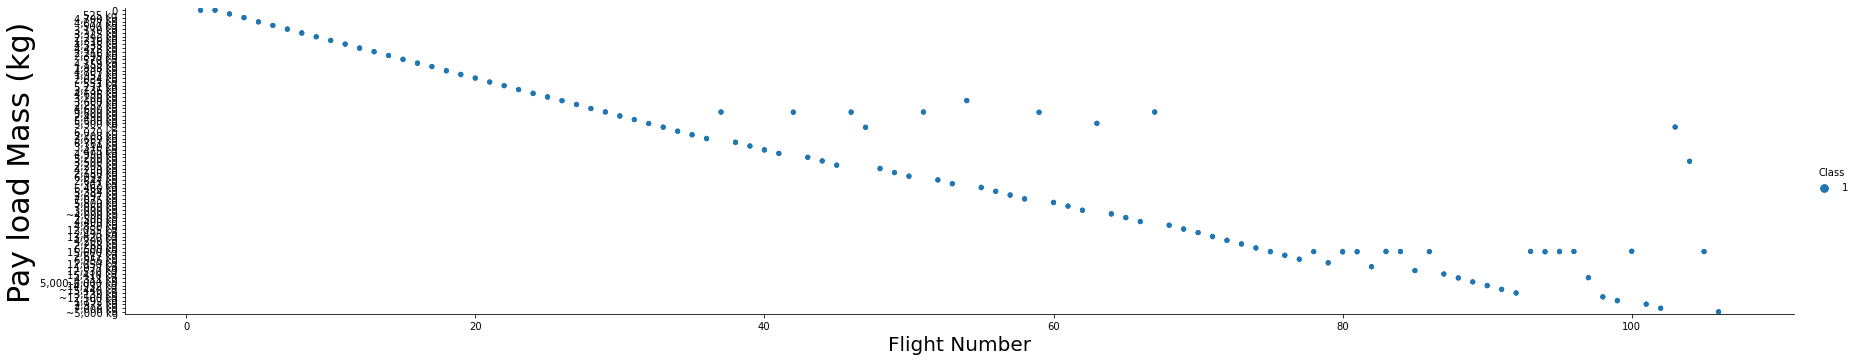

In [21]:
sns.catplot(y="PLM", x="Flight Number", hue="Class", data=data_part3, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=30)
plt.show()

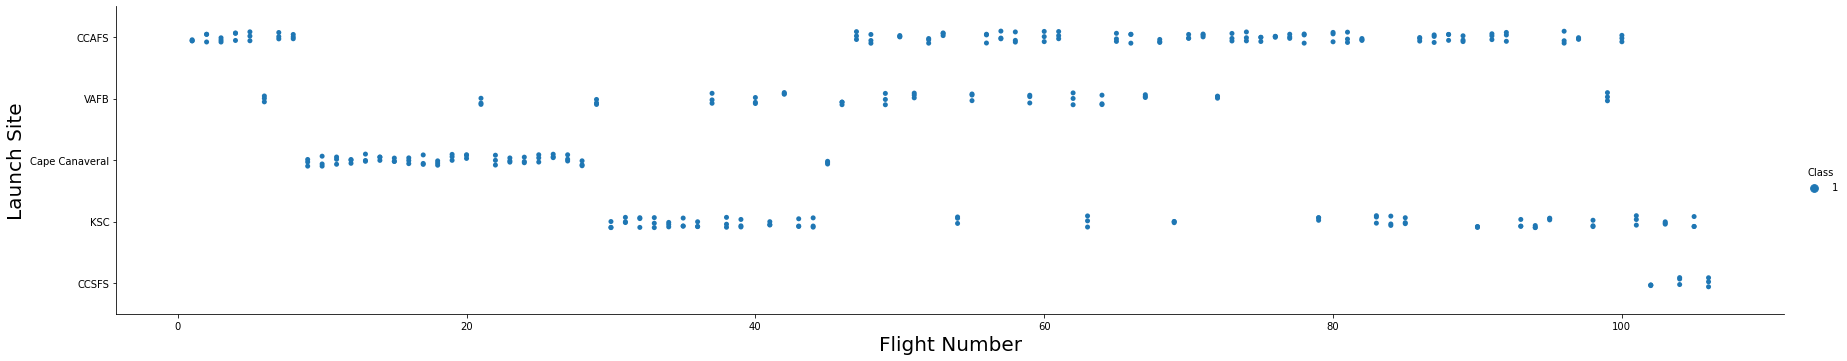

In [22]:
sns.catplot(y="Launch site", x="Flight Number", hue="Class", data=data_part3, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

In [23]:
df_groupby_orbits = data_part3.groupby('Orbit').Class.mean()
df_groupby_orbits

Orbit
GTO            1.0
HEO            1.0
LEO            1.0
MEO            1.0
Polar          1.0
Polar orbit    1.0
SSO            1.0
Sub-orbital    1.0
Name: Class, dtype: float64

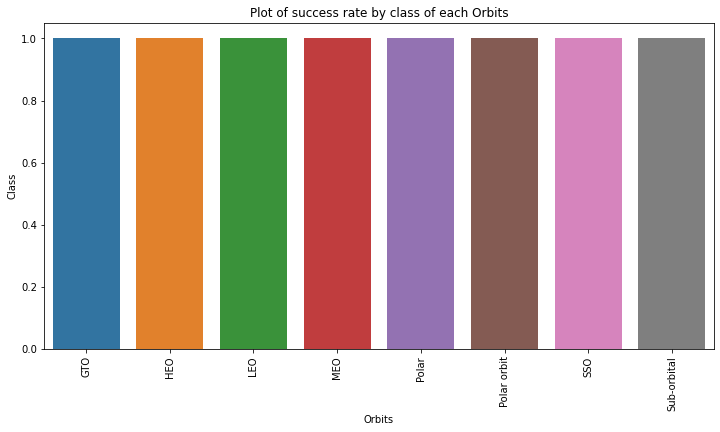

In [24]:
grouped_orbits = data_part3.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()
fig, ax=plt.subplots(figsize=(12,6))
ax = sns.barplot(x = 'Orbit', y = 'Class', data=grouped_orbits)
ax.set_title('Plot of success rate by class of each Orbits', fontdict={'size':12})
ax.set_ylabel('Class', fontsize = 10)
ax.set_xlabel('Orbits', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation=90);

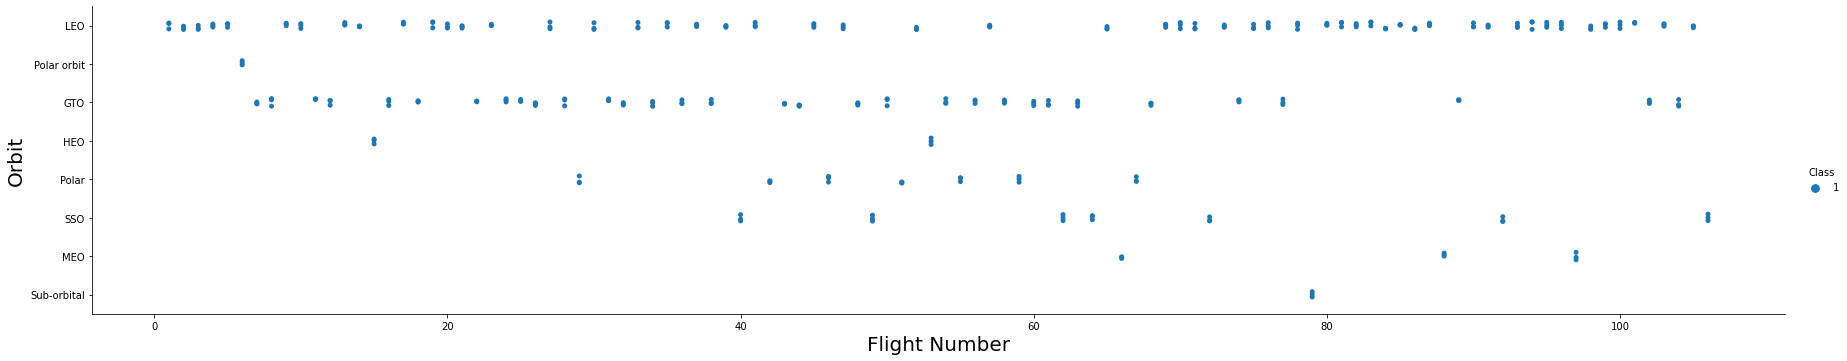

In [25]:
sns.catplot(y="Orbit", x="Flight Number", hue="Class", data=data_part3, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

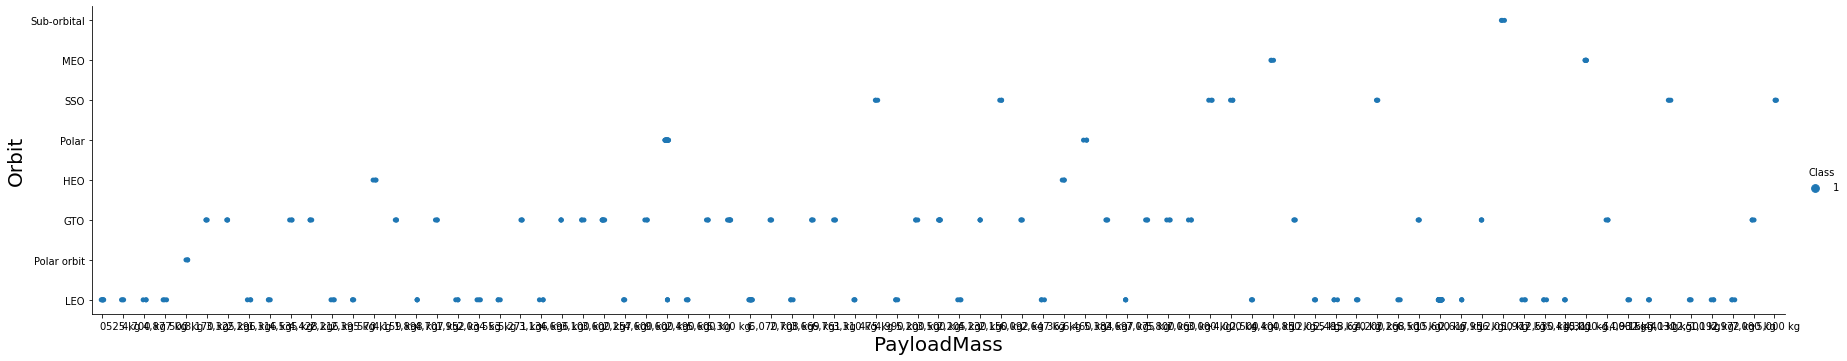

In [27]:
sns.catplot(y="Orbit", x="PLM", hue="Class", data=data_part3, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In [33]:
year=[]
def Extract_year(date):
    for i in data_part3["Date"]:
        year.append(i.split("-")[0])
    return year

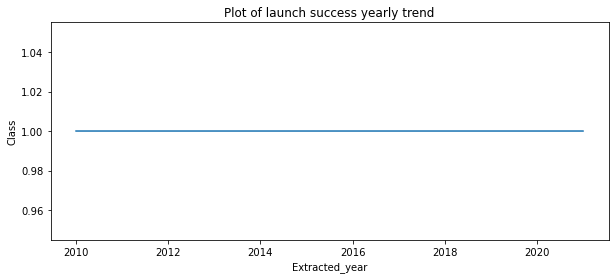

In [31]:
df_copy = data_part3.copy()
df_copy['Extracted_year'] = pd.DatetimeIndex(data_part3['Date']).year


fig, ax=plt.subplots(figsize=(10,4))
sns.lineplot(data=df_copy, x='Extracted_year', y='Class')
plt.title('Plot of launch success yearly trend');
plt.show()

In [34]:
features = data_part3[['Flight Number','Launch site','Payload','PLM','Orbit','Customer','Launch outcome','Version Booster','Booster landing','Date','Time','Class']]
features.head()

,Flight Number,Launch site,Payload,PLM,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time,Class
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,F9 v1.0B0003.1,Failure,4 June 2010,18:45,1
1,2,CCAFS,Dragon,0,LEO,NASA,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43,1
2,3,CCAFS,Dragon,525 kg,LEO,NASA,Success,F9 v1.0B0005.1,No attempt\n,22 May 2012,07:44,1
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,F9 v1.0B0006.1,No attempt,8 October 2012,00:35,1
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,F9 v1.0B0007.1,No attempt\n,1 March 2013,15:10,1


In [35]:
features_one_hot = pd.get_dummies(features, drop_first=True)
features_one_hot.head()

,Flight Number,Class,Launch site_CCSFS,Launch site_Cape Canaveral,Launch site_KSC,Launch site_VAFB,Payload_ABS-3A,Payload_AMOS-17,Payload_ANASIS-II,Payload_AsiaSat 6,...,Time_22:41,Time_22:51,Time_22:53:00,Time_23:03,Time_23:18,Time_23:21,Time_23:23,Time_23:24:23,Time_23:35,Time_23:38
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
features_one_hot =  features_one_hot.astype(float)
features_one_hot.dtypes

Flight Number                 float64
Class                         float64
Launch site_CCSFS             float64
Launch site_Cape Canaveral    float64
Launch site_KSC               float64
                               ...   
Time_23:21                    float64
Time_23:23                    float64
Time_23:24:23                 float64
Time_23:35                    float64
Time_23:38                    float64
Length: 469, dtype: object

In [37]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)